# Unit 5 - Financial Planning


In [30]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc_wallet = 1.2
my_eth_wallet = 5.3

In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [34]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc = requests.get(btc_url).json()
my_btc = my_btc['data']['1']['quotes']['USD']['price']

In [35]:
# Fetch current ETH price
# YOUR CODE HERE!]
my_eth = requests.get(eth_url).json()
my_eth = my_eth['data']['1027']['quotes']['USD']['price']

In [36]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * my_btc_wallet
my_eth_value = my_eth * my_eth_wallet
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 36014.0 BTC is $43216.80
The current value of your 2554.09 ETH is $13536.68


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Current amount of shares
# YOUR CODE HERE!
my_spy_wallet = 50
my_agg_wallet = 200

In [38]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [39]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-05-27 00:00:00-04:00  114.61  114.62  114.45  114.545  4826895  420.17   

                                                               
                             high       low   close    volume  
time                                                           
2021-05-27 00:00:00-04:00  420.72  418.9851  419.69  48411613

In [40]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio['AGG']['close'].item()
spy_close_price = df_portfolio['SPY']['close'].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.545
Current SPY closing price: $419.69


In [41]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy_wallet * spy_close_price
my_agg_value = my_agg_wallet * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy_wallet} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg_wallet} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20984.50
The current value of your 200 AGG shares is $22909.00


### Savings Health Analysis

In [42]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = 12000.00
# Create savings DataFrame
df_savings_dict = {'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
# YOUR CODE HERE!
df_savings = pd.DataFrame(df_savings_dict, index = ['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,56753.477
shares,43893.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

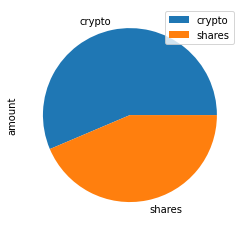

In [43]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie',
                subplots= True,
)

In [44]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum().item()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congrats you have more than enough in your savings fund')
elif total_savings == emergency_fund:
    print('Congrats you just have enough money in your fund and have reached your goal')
else:
    print(f'NOT CONGRATS YOU ARE ${emergency_fund - total_savings} FROM YOUR GOAL, YOU NEED TO GET YOUR MONIES UP NOT YOUR FUNNIES UP')

Congrats you have more than enough in your savings fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY            \
              open      high       low   close    volume    open      high   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292  236.25  248.3700   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320  239.25  247.3800   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412  242.53  244.4700   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510  228.19  229.6833   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498  234.42  244.1000   

                                       
               low   close     volume  
2020-03-18  228.02  241.01  298252778  
2020-03-19  232.22  241.16  261233795  
2020-03-20  228.50  228.94  302880969  
2020-03-23  218.26  222.51  280560712  
2020-03-24  233.80  243.59  211595249

In [47]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [48]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  298252778          NaN  
2020-03-19  247.3800  232.22  241.16  261233795     0.000622  
2020-03-20  244.4700  228.50  228.94  302880969    -0.050672  
2020-03-23  229.6833  218.26  222.51  280560712    -0.028086  
2020-03-24  244.1000  233.80  243.59  211595249     0.094737

In [55]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.976804e-01,1.005244e+00,1.016857e+00,1.011552e+00,1.011682e+00,9.910363e-01,9.999920e-01,9.833521e-01,1.013455e+00,1.001039e+00,...,1.001371e+00,9.991068e-01,1.015231e+00,9.948033e-01,9.956318e-01,9.985745e-01,1.001895e+00,1.002379e+00,1.020757e+00,1.001080e+00
2,9.971719e-01,1.001024e+00,1.007163e+00,1.021260e+00,9.965111e-01,9.894891e-01,9.995220e-01,9.757255e-01,1.018561e+00,1.007446e+00,...,9.929861e-01,9.865388e-01,1.019573e+00,1.004187e+00,1.001340e+00,1.000501e+00,1.012049e+00,1.000456e+00,1.010133e+00,1.007296e+00
3,9.794491e-01,1.020452e+00,1.002438e+00,1.015759e+00,9.914031e-01,9.992282e-01,1.010887e+00,9.908986e-01,1.011232e+00,1.014693e+00,...,1.001863e+00,1.015431e+00,1.008342e+00,1.010426e+00,1.014542e+00,1.000162e+00,1.015978e+00,1.009598e+00,1.011034e+00,1.015640e+00
4,9.530187e-01,1.008237e+00,1.005985e+00,1.016162e+00,9.897055e-01,1.007887e+00,1.006947e+00,9.739705e-01,1.014171e+00,1.024869e+00,...,9.834647e-01,1.004698e+00,1.014356e+00,1.027504e+00,1.023315e+00,1.010737e+00,1.013600e+00,1.014218e+00,9.964423e-01,1.030669e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.498375e+07,3.413417e+07,4.531330e+08,1.735354e+08,1.393230e+08,2.291925e+08,1.954952e+08,1.525408e+08,1.350527e+08,2.217696e+08,...,5.873570e+08,6.634983e+07,2.639875e+08,1.916720e+08,1.507883e+09,4.451196e+07,2.728521e+08,4.641325e+07,1.646872e+08,1.723590e+08
7557,1.539893e+07,3.446607e+07,4.587023e+08,1.750296e+08,1.411473e+08,2.318816e+08,1.992604e+08,1.539332e+08,1.352434e+08,2.241778e+08,...,6.111673e+08,6.745555e+07,2.627627e+08,1.896627e+08,1.540193e+09,4.515864e+07,2.719642e+08,4.670188e+07,1.652390e+08,1.712642e+08
7558,1.592317e+07,3.421804e+07,4.669065e+08,1.767679e+08,1.435013e+08,2.333848e+08,2.001826e+08,1.551536e+08,1.376116e+08,2.210288e+08,...,6.148760e+08,6.784106e+07,2.626520e+08,1.916865e+08,1.537356e+09,4.533823e+07,2.681747e+08,4.691649e+07,1.633941e+08,1.758655e+08
7559,1.617705e+07,3.415517e+07,4.696341e+08,1.773079e+08,1.440274e+08,2.334003e+08,2.003275e+08,1.597279e+08,1.395039e+08,2.232867e+08,...,6.113972e+08,6.914649e+07,2.591874e+08,1.955273e+08,1.511584e+09,4.558344e+07,2.743742e+08,4.717944e+07,1.622406e+08,1.791271e+08


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

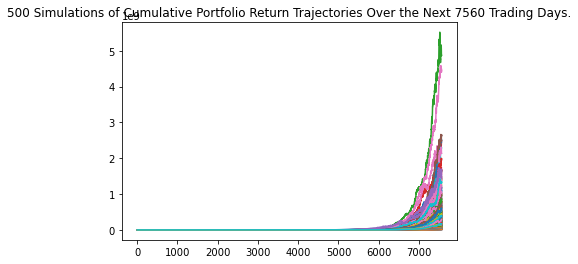

In [57]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_thirty_year.plot_simulation()

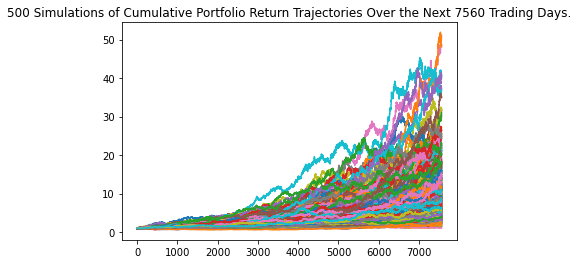

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

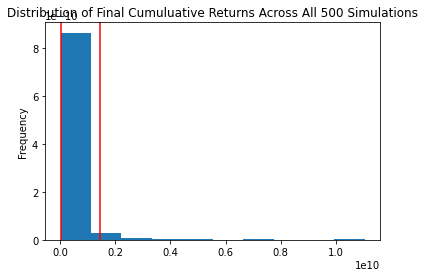

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl =  MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           5.000000e+02
mean            3.445858e+08
std             4.949521e+08
min             8.309157e+06
25%             8.311306e+07
50%             1.799756e+08
75%             3.948455e+08
max             4.868294e+09
95% CI Lower    2.175491e+07
95% CI Upper    1.639421e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [63]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]* initial_investment, 2)
ci_upper = round(tbl[9]* initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $435098111525.76 and $32788421953970.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $652647167288.64 and $49182632930956.48
